# p-hat Sampling Distribution

 2022-06-20 11:31:16,255 - DEBUG - Start of Program


Choose your sample size. Value must be a positive integer of at most 1000. Or press return to exit: 1000
Choose your probability of success. Value must be a number in the interval [0, 1]. Or press return to exit: 0.9



The mean of this theoretical binomial distribution: 900.0


The standard deviation of this theoretical binomial distribution: 9.486832980505138



Choose your lower bound for the area under the curve of the normal distribution N(900.0, 9.486832980505138). Value must be an integer in the interval [-10, 1010]. Or press return to exit: 890
Choose your upper bound for area under the curve of the normal distribution N(900.0, 9.486832980505138). Value must be an integer in the interval [890, 1010]. Or press return to exit: 1010



Probability for the binomial outcome in interval [890, 1010]: 0.865261

Probability for the normal outcome in interval (890, 1010): 0.854315



 2022-06-20 11:31:42,763 - DEBUG - update_title_pos
 2022-06-20 11:31:44,208 - DEBUG - update_title_pos
 2022-06-20 11:31:45,926 - DEBUG - update_title_pos
 2022-06-20 11:31:46,860 - DEBUG - update_title_pos


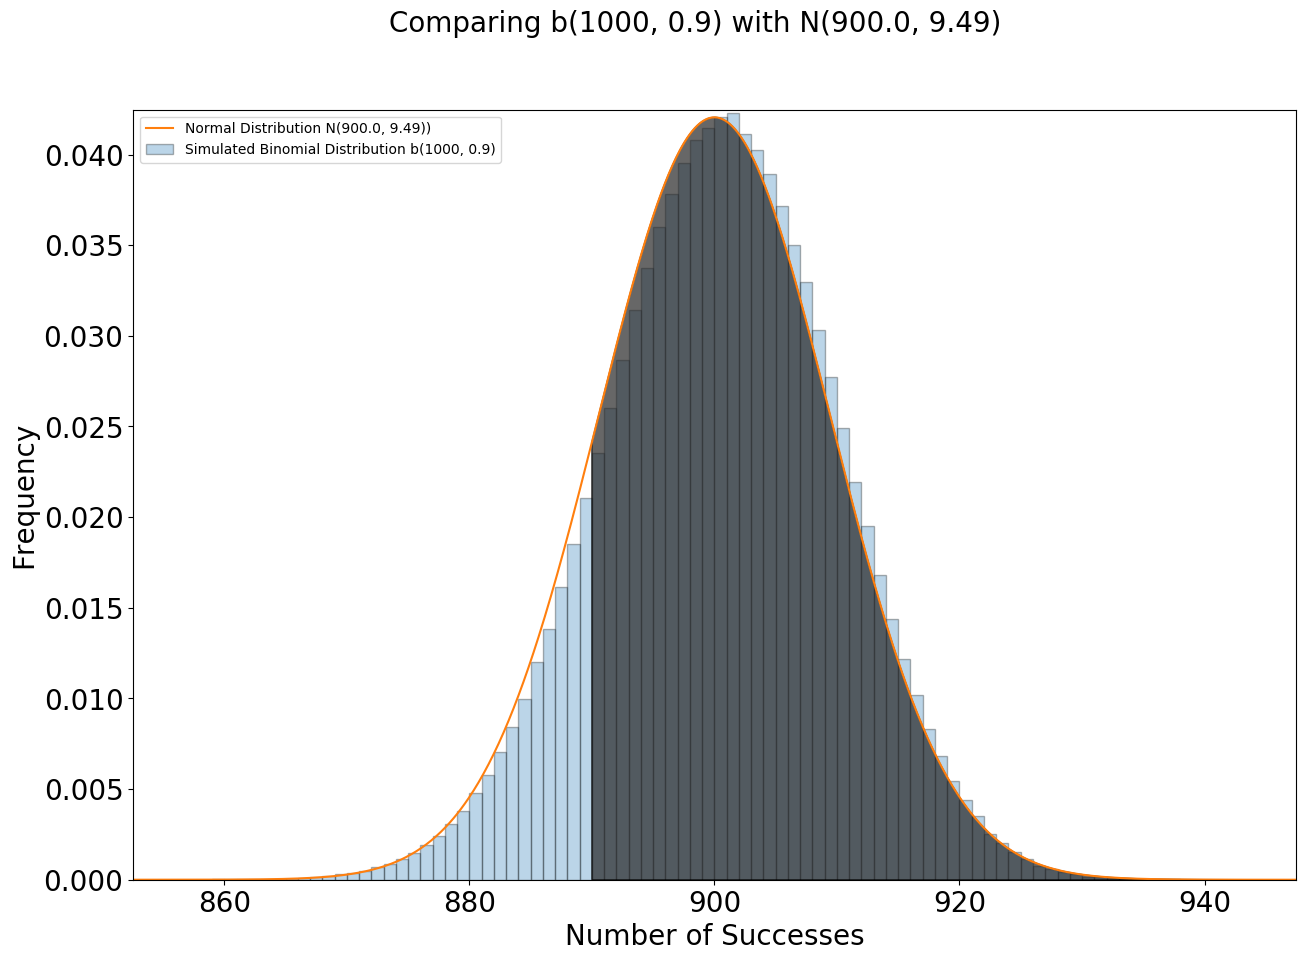

Choose your sample size. Value must be a positive integer of at most 1000. Or press return to exit: 1000
Choose the number of samples. Value must be a positive integer of at most 10000. Or press return to exit: 10000


 2022-06-20 11:32:26,506 - DEBUG - update_title_pos
 2022-06-20 11:32:26,849 - DEBUG - update_title_pos
 2022-06-20 11:32:26,980 - DEBUG - update_title_pos
 2022-06-20 11:32:27,084 - DEBUG - update_title_pos


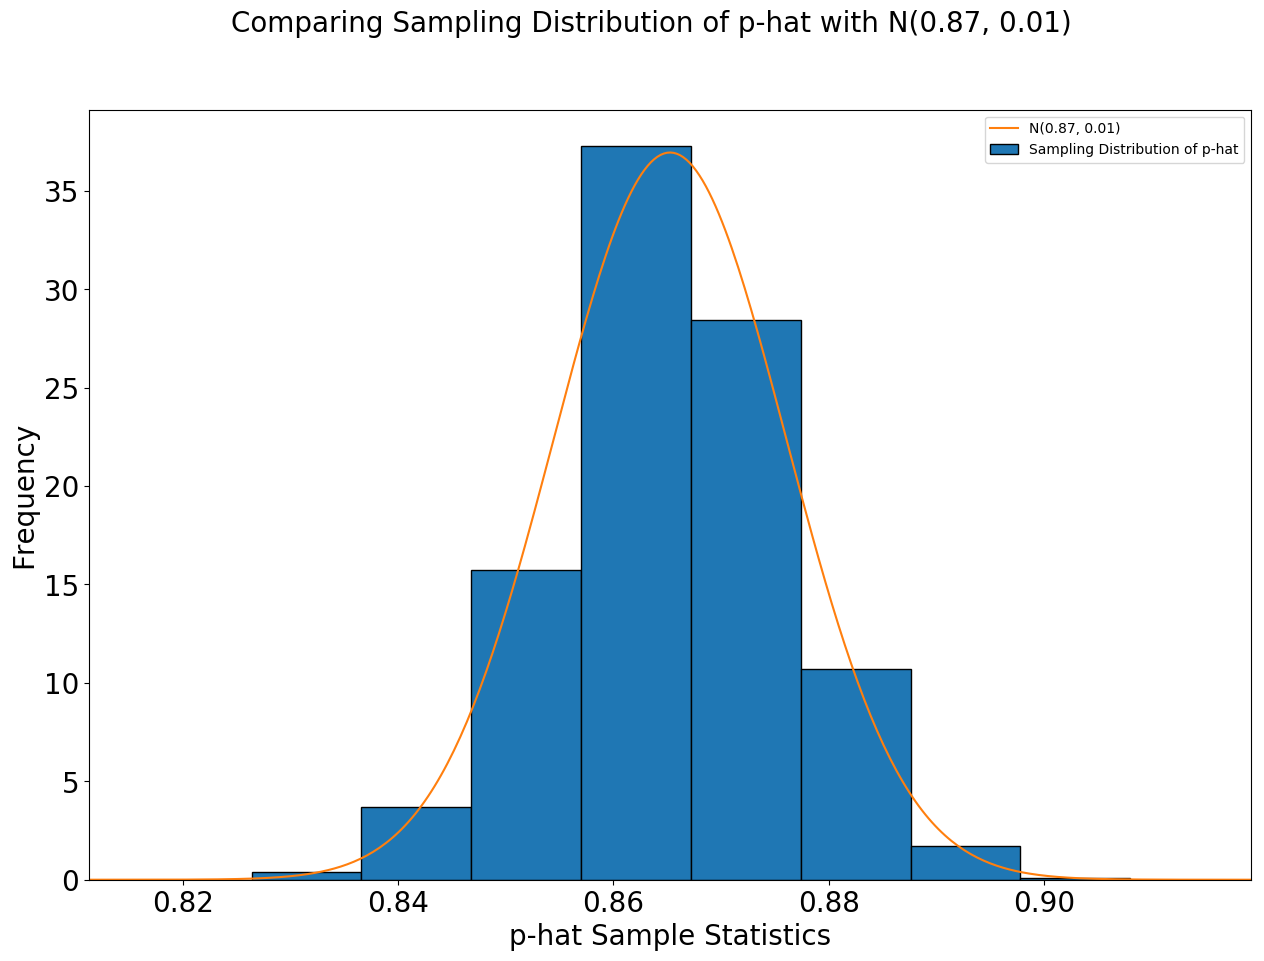

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import scipy.stats as stats
import numpy as np
import logging
logging.basicConfig(level='DEBUG', format=' %(asctime)s - %(levelname)s'\
    ' - %(message)s')
logging.getLogger('matplotlib.font_manager').disabled = True


logging.debug('Start of Program')


def binomial_to_p_hat():
    """This program constructs a Simulated Binomial Distribution with parameters
b(n, p) and visually compares it with the Theoretical Normal Distrbution
N(np, np(1-p)),computing the area between lower and upper bounds, input
by the user, for both distributions.
Afterwards, the program uses the Simulated Binomial
Distribution, along with further user input, to construct a Sampling
Distribution of the p-hat Estimator, which has a theoretical mean of
p_avg and theoretical standard deviation of sqrt(p_avg*(1-p_avg)/m), and
compares that with the Theoretical Normal Distribution
N(p_avg, sqrt(p_avg*(1-p_avg)/m))"""
    
    
    # User input for sample size n
    flag = True
    while flag:
        
        
        n_input = input('Choose your sample size. Value must be a'\
            ' positive integer of at most 1000.'\
            ' Or press return to exit: ')
        
        
        if not n_input:
            return 'Goodbye'
        
        
        try:
            n = int(n_input)
            if n < 1:
                logging.debug('Sample size must be a positive integer'\
                    ' of at most one thousand.')
                continue
            flag = False
            continue
        except ValueError:
            logging.debug('Sample size must be a positive integer'\
                    ' of at most 1000.')
            continue
            
            
    # User input for probability of success p
    flag = True
    while flag:
        
        
        p_input = input('Choose your probability of success.'\
            ' Value must be a number in the interval [0, 1].'\
            ' Or press return to exit: ')
        
        
        if not p_input:
            return 'Goodbye'
        
        
        try:
            p = float(p_input)
            if p < 0 or p > 1:
                logging.debug('Value must be a number in the interval [0, 1].')
                continue
            flag = False
            continue
        except ValueError:
            logging.debug('Value must be a number in the interval [0, 1].')
            continue
            
            
    # Display theoretical mean and standard deviation of the 
    # probability distribution with parameters 'n' and 'p'
    print('\n\n')
    print(f'The mean of this theoretical binomial distribution: {n*p}')
    print('\n')
    print(f'The standard deviation of this theoretical'\
        f' binomial distribution: {np.sqrt(n*p*(1-p))}')
    print('\n\n')
    
    
    # User input for lower bound for area under the normal curve
    flag = True
    while flag:
        
        
        lower_input = input('Choose your lower bound for'\
            ' the area under the curve of the normal distribution'
            f' N({n*p}, {np.sqrt(n*p*(1-p))}).'\
            ' Value must be an integer'\
            f' in the interval [-10, 1010].'\
            ' Or press return to exit: ')
        
        
        if not lower_input:
            return 'Goodbye'
        
        
        try:
            lower = int(lower_input)
            if lower < -10 or lower > 1010:
                logging.debug('Value must be an integer in'\
                    ' [-10, 1010].')
                continue
            flag = False
            continue
        except ValueError:
            logging.debug('Value must be an integer in'\
                    ' [-10, 1010].')
            continue
            
            
    # User input for upper bound for area under the normal curve
    flag = True
    while flag:
        
        
        upper_input = input('Choose your upper bound for'\
            ' area under the curve of the normal distribution'
            f' N({n*p}, {np.sqrt(n*p*(1-p))}).'\
            ' Value must be an integer'\
            f' in the interval [{lower}, 1010].'\
            ' Or press return to exit: ')
        
        
        if not upper_input:
            return 'Goodbye'
        
        
        try:
            upper = int(upper_input)
            if upper < lower or upper > 1010:
                logging.debug('Value must be an integer in'\
                    ' [{lower}, 1010].')
                continue
            flag = False
            continue
        except ValueError:
            logging.debug('Value must be an integer in [{lower}, 1010].')
            continue
            
            
    print('\n\n')
            
        
    # We construct our Simulated-Theoretical Binomial Distribution
        
            
    # Theoretical Binomial Distribution: X
    # Domain: X_domain
    X = stats.binom(n, p)
    X_domain = np.arange(0, n+1)
    

    # Taking 1 million samples from the Theoretical Binomial 
    # Distribution of 'n' trials of a chance outcome with 
    # probability of success 'p' and using that to construct
    # a sample distribition, which will serve as our 
    # simulated-theoretical distribution
    # 1 million samples from the distribution: X_samples
    X_samples = X.rvs(10**6)
    print(f'Probability for the binomial outcome in interval'\
        f' [{lower}, {upper}]:'\
        f' {((X_samples>=lower) & (X_samples<=upper)).sum()/(10**6)}\n')
    
    
    # We construct our Theoretical Normal Distribution
    

    # Theoretical Normal Distribution having mean and standard deviation
    # equal to 'n*p' and 'sqrt(n*p*(1-p))', respectively. These are the
    # mean and standard deviation, respectively, of the Theoretical 
    # Binomial Distribution
    # Normal Distribution: Y
    # Domain: Y_domain 
    # Range: pdf_values(X, x)
    Y = stats.norm(X.mean(), X.std())
    Y_domain = np.linspace(-10, 1010, 10000)
    def pdf_values(X, x):
        return X.pdf(x)
    Y_rv = pdf_values(Y, Y_domain)


    # Taking 1 million samples from the Theoretical Normal 
    # Distribution
    Y_samples = Y.rvs(10**6)
    print(f'Probability for the normal outcome in interval'\
        f' ({lower}, {upper}):'\
        f' {((Y_samples>lower) & (Y_samples<upper)).sum()/(10**6)}\n')

    
    # Plotting the graph of both the Simulated Binomial
    # Distribution, overlaid with the Theoretical Normal Distribution,
    # shaded between the lower and upper bounds input by the user
    # Histogram of the Binomial:
    bins = list(range(n+1))
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.hist(X_samples, bins=bins, ec='k', alpha=0.3, density=True,\
        label=f'Simulated Binomial Distribution b({n}, {p})')
    
    
    # Plot of the Normal:
    ax.plot(Y_domain, Y_rv,\
        label=f'Normal Distribution N({np.round(X.mean(), 2)},'\
        f' {np.round(X.std(), 2)}))')
    plt.ylim(0, Y_rv.max()+(Y_rv.max()/10**2))
    plt.xlim(X.mean()-(5*X.std()), X.mean()+(5*X.std()))
    
    
    # Shading of the plotted Normal:
    ix = np.linspace(lower, upper, 1000)
    iy = pdf_values(Y, ix)
    verts = [(lower, 0), *zip(ix, iy), (upper, 0)]
    poly = Polygon(verts, facecolor='0.15', edgecolor='0', alpha=0.7)
    ax.add_patch(poly)
    plt.xlabel('Number of Successes', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    fig.suptitle(f'Comparing b({n}, {p}) with N({np.round(X.mean(), 2)},'\
        f' {np.round(X.std(), 2)})', fontsize=20)
    plt.legend(prop={'size': 10})
    plt.show()
    
    
    # We have the probability, p_avg, of observing a value between the
    # 'lower' and 'upper' bounds input by the user.
    # This will serve as our probability of success in the 
    # distribution of p-hats we construct.
    p_avg = ((X_samples>=lower) & (X_samples<=upper)).sum()/(10**6)
    
    
    if p_avg > 0.99:
        return 'We have a near certainty for success.'
    if p_avg < 0.01:
        return 'We have a near certainty for failure.'

    
    # Now we construct our p-hat distribution
    
    
    # User input for sample size, m, to be pulled from the 
    # Simulated-Theoretical Binomial Distribution followed 
    # by random variable X above
    flag = True
    while flag:
        
        
        m_input = input('Choose your sample size. Value must be a'\
            ' positive integer of at most 1000.'\
            ' Or press return to exit: ')
        
        
        if not m_input:
            return 'Goodbye'
        
        
        try:
            m = int(m_input)
            if m < 1:
                logging.debug('Sample size must be a positive integer'\
                    ' of at most 1000.')
                continue
            flag = False
            continue
        except ValueError:
            llogging.debug('Sample size must be a positive integer'\
                    ' of at most 1000.')
            continue
            
            
    # User input for number of samples N
    flag = True
    while flag:
        
        
        N_input = input('Choose the number of samples. Value must be a'\
            ' positive integer of at most 10000. Or press return to exit: ')
        
        
        if not N_input:
            return 'Goodbye'
        
        
        try:
            N = int(N_input)
            if N < 1:
                logging.debug('Number of samples must be a positive integer'\
                ' of at most 10000.')
                continue
            flag = False
            continue
        except ValueError:
            logging.debug('Number of samples must be a positive integer'\
                ' of at most 10000.')
            continue
            
    
    # The list of N p-hats resulting from N experiments, each of 
    # size m.
    # A success is any outcome in a sample that lies between
    # the lower and upper bounds input by the user
    p_hats = np.empty(shape=(1, N))
    for i in range(N):
        sample = X.rvs(m)
        successes = []
        for j in sample:
            if j >= lower and j <= upper:
                successes.append(j)
        p_hats[0][i] = len(successes)/m
    
    
    # Constructing the histogram of the p-hat distribution and 
    # overlaying it with a Theoretical Normal Distribution
    # N(mean_p_hat, std_p_hat)
    mean_p_hat = p_avg
    std_p_hat = np.sqrt(p_avg*(1-p_avg)/m)
    
    
    # We will need an increment as we move from the minimum to the maximum
    # value in the array of p_hats generated above
    increment = (p_hats.max() - p_hats.min())/10
    
    
    # We need to set the minimum and maximum values for the bins argument
    # in our histogram
    low_bins = p_hats.min()
    upp_bins = p_hats.max() + increment
    
    
    # Here are the bins for our histogram
    bins = np.arange(low_bins, upp_bins, increment)
    
    
    # Plotting the graph of our histogram for the p-hat distribution
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.hist(p_hats[0], bins=bins.tolist(), ec='k', density=True, \
    label='Sampling Distribution of p-hat')
    
    
    # Plotting the graph of the Theoretical Normail Distribution
    # N(mean_p_hat, std_p_hat)
    Z = stats.norm(mean_p_hat, std_p_hat)
    Z_domain = np.linspace(-1, 2, 10000)
    Z_rv = Z.pdf(Z_domain)
    ax.plot(Z_domain, Z_rv, label=f'N({np.round(mean_p_hat, 2)},'\
        f' {np.round(std_p_hat, 2)})')
    plt.xlim(mean_p_hat-(5*std_p_hat), mean_p_hat+(5*std_p_hat))
    plt.xlabel('p-hat Sample Statistics', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    fig.suptitle(f'Comparing Sampling Distribution of p-hat with'\
        f' N({np.round(mean_p_hat, 2)}, {np.round(std_p_hat, 2)})', fontsize=20)
    plt.legend(prop={'size': 10})
    plt.show()
    
    
binomial_to_p_hat()
